# Gradiant decent

#### Preproccessing

In [1]:
import numpy as np
from numpy import log, exp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train.csv")
data = data[(data['label']==2) | (data['label']==7)]

In [3]:
n_data = len(data.index)
n_train = int(n_data*0.9)
n_test = int(n_data*0.1)

In [4]:
x_train = data.drop("label", axis= 1).iloc[:n_train]
y_train = data['label'].iloc[:n_train]
x_test = data.drop("label", axis= 1).iloc[n_train:]
y_test = data['label'].iloc[n_train:]
vector_len = x_train.shape[1]

In [5]:
def show_example():
    random_int = np.random.randint(0,1000)
    example = x_train.iloc[random_int]
    label = y_train.iloc[random_int]
    example = example.to_numpy()/max(example)
    example = np.reshape(example, (28,28))
    plt.imshow(example, cmap='plasma')
    plt.title(f'number {label}')
    return example


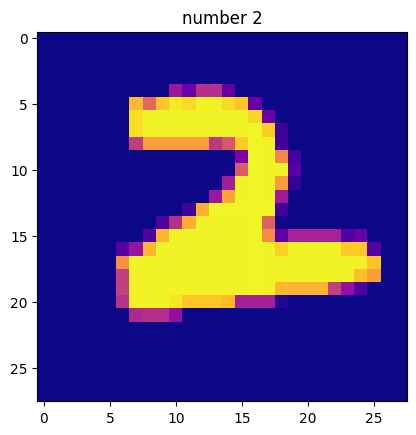

In [6]:
example = show_example()

In [7]:
y_train.replace({2:-1,7:1}, inplace=True)
y_test.replace({2:-1,7:1}, inplace=True)

In [8]:
x_train = x_train.to_numpy()/255
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()/255
y_test = y_test.to_numpy()

### Training

In [9]:
def J(w, b, n, X, Y):
    x = X
    y = Y
    value = 0
    for i in range(n):
        value += log(1+exp(-y[i] * (b+np.matmul(x[i].transpose(), w))))
    return value/n


def mue(w, b, i, X, Y):
    x = X
    y = Y
    return 1/(1+exp(-y[i]*(b+np.matmul(x[i].transpose(), w))))


def J_grad_w(w, b, n, X, Y, start_point=0):
    x = X
    y = Y
    value = 0
    for i in range(n):
        i += start_point
        x_Tr = x[i].reshape(1, -1)
        value += (-y[i]*x_Tr) * \
            (exp(-y[i] * (b+np.matmul(x_Tr, w))))/mue(w, b, i, X, Y)
    return (value/n).transpose()


def J_grad_b(w, b, n, X, Y, start_point=0):
    x = X
    y = Y
    value = 0
    for i in range(n):
        i += start_point
        x_Tr = x[i].reshape(1, -1)
        value += - y[i] * (exp(-y[i]*(b+np.matmul(x_Tr, w))))/mue(w, b, i, X, Y)
    return value/n


In [10]:
b = 0
w = np.zeros((1,vector_len)).transpose()


In [11]:
def mnist_model(w, b, eta=10e-3, epoch=10, batch_size=n_train):
    b = 0
    w = np.zeros((1, vector_len)).transpose()
    train_loss = [0]*(epoch+1)
    test_loss = [0]*(epoch+1)
    train_loss[0] = J(w, b, n_train, X=x_train, Y=y_train)
    test_loss[0] = J(w, b, n_test, X=x_test, Y=y_test)
    for i in range(epoch):
        for j in range(n_train//batch_size):
            w = w - eta*J_grad_w(w, b, batch_size, x_train, y_train, j*batch_size)
            b = b - eta*J_grad_b(w, b, batch_size, x_train, y_train, j*batch_size)
        train_loss[i+1] = J(w, b, n_train, X=x_train, Y=y_train).reshape(-1)
        test_loss[i+1] = J(w, b, n_test, X=x_test, Y=y_test).reshape(-1)
    return train_loss, test_loss, w, b


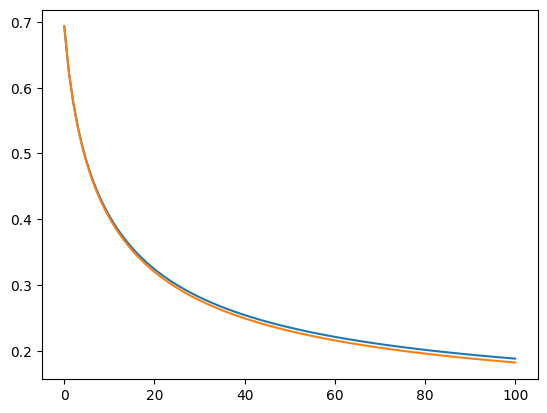

In [12]:
train_loss, test_loss, w, b = mnist_model(w,b,10**-2,100)
plt.plot(train_loss)
plt.plot(test_loss)

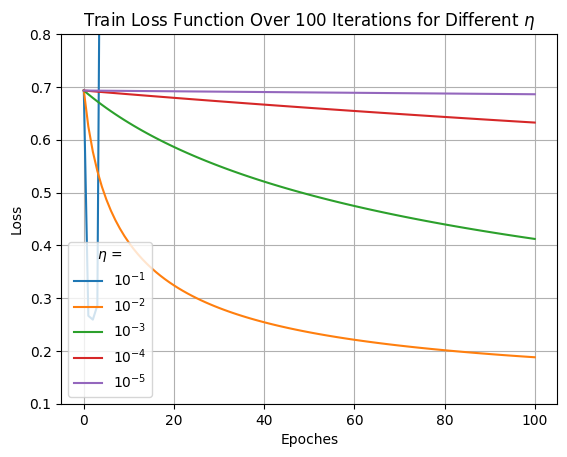

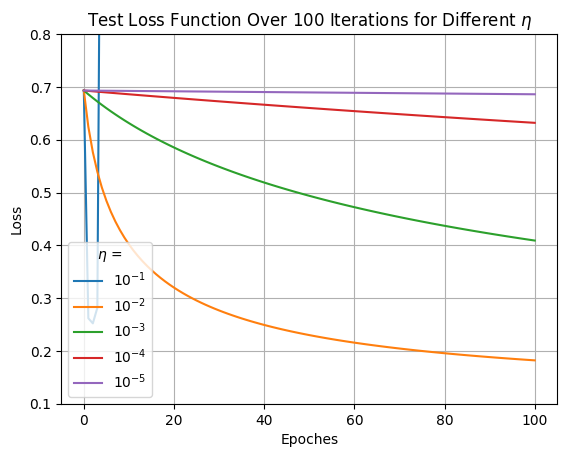

In [13]:
epoch = 100
loss = [0]*5
loss[0] = mnist_model(w,b,10**-1,4)[:2]
loss[1] = mnist_model(w,b,10**-2,100)[:2]
loss[2] = mnist_model(w,b,10**-3,100)[:2]
loss[3] = mnist_model(w,b,10**-4,100)[:2]
loss[4] = mnist_model(w,b,10**-5,100)[:2]
plt.figure()
for i in range(5):
    plt.plot(loss[i][0])
plt.legend(['$10^{-1}$','$10^{-2}$','$10^{-3}$','$10^{-4}$','$10^{-5}$'], title="$\eta$ = ")
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.title(f"Train Loss Function Over {epoch} Iterations for Different $\eta$")
plt.ylim([0.1,0.8])
plt.grid("ON")
plt.figure()
for i in range(5):
    plt.plot(loss[i][1])
plt.legend(['$10^{-1}$','$10^{-2}$','$10^{-3}$','$10^{-4}$','$10^{-5}$'], title="$\eta$ = ")
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.title(f"Test Loss Function Over {epoch} Iterations for Different $\eta$")
plt.ylim([0.1,0.8])
plt.grid("ON")

### evaluation 

array([[-3.17884553]])

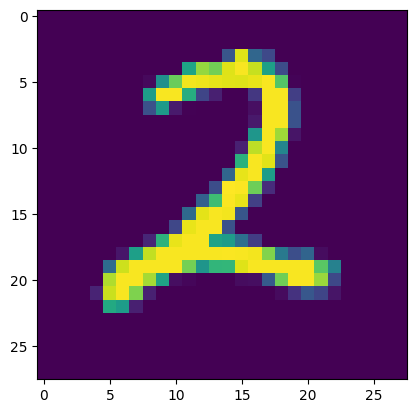

In [14]:
tt = np.random.randint(1000)
plt.imshow(x_train[tt].reshape(28,28))
b+ np.matmul(x_train[tt].transpose(),w)

In [15]:
n_corrects = 0
for i in range(n_train):
    result = np.sign(b+ np.matmul(x_train[i].transpose(),w))
    if int(result) == y_train[i]:
        n_corrects += 1
print(f"Model train accuracy is {n_corrects/n_train*100:0.2f}%")
n_corrects = 0
for i in range(n_test):
    result = np.sign(b+ np.matmul(x_test[i].transpose(),w))
    if int(result) == y_test[i]:
        n_corrects += 1
print(f"Model test accuracy is {n_corrects/n_test*100:0.2f}%")

Model train accuracy is 97.18%
Model test accuracy is 98.13%


# Stochastic Gradiant Decent

## Batch size: 1

### Training

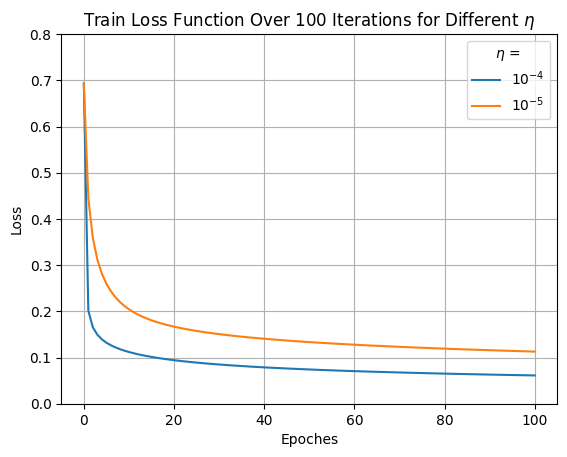

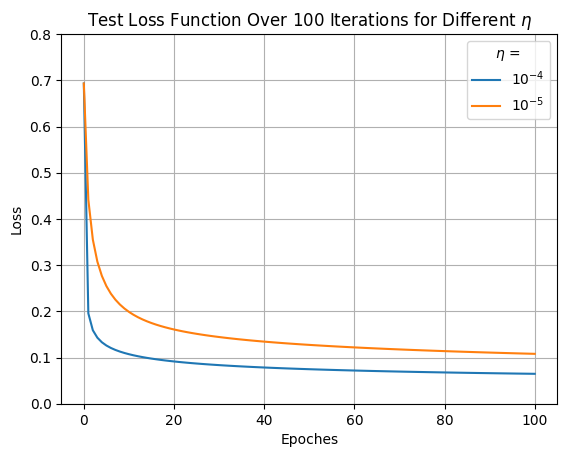

In [16]:
epoch = 100
loss = [0]*2
loss[0] = mnist_model(w,b,10**-4,100, batch_size = 1)[:2]
loss[1] = mnist_model(w,b,10**-5,100, batch_size = 1)[:2]
plt.figure()
for i in range(2):
    plt.plot(loss[i][0])
plt.legend(['$10^{-4}$','$10^{-5}$'], title="$\eta$ = ")
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.title(f"Train Loss Function Over {epoch} Iterations for Different $\eta$")
plt.ylim([0,0.8])
plt.grid("ON")
# test plot
plt.figure()
for i in range(2):
    plt.plot(loss[i][1])
plt.legend(['$10^{-4}$','$10^{-5}$'], title="$\eta$ = ")
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.title(f"Test Loss Function Over {epoch} Iterations for Different $\eta$")
plt.ylim([0,0.8])
plt.grid("ON")

### Evaluation

In [17]:
train_loss, test_loss, w,b = mnist_model(w,b,10**-4,100, batch_size = 1)

In [18]:
n_corrects = 0
for i in range(n_train):
    result = np.sign(b+ np.matmul(x_train[i].transpose(),w))
    if int(result) == y_train[i]:
        n_corrects += 1
print(f"Model accuracy is {n_corrects/n_train*100:0.2f}%")

n_corrects = 0
for i in range(n_test):
    result = np.sign(b+ np.matmul(x_test[i].transpose(),w))
    if int(result) == y_test[i]:
        n_corrects += 1
print(f"Model accuracy is {n_corrects/n_test*100:0.2f}%")

Model accuracy is 98.72%
Model accuracy is 99.07%


array([[3.50327432]])

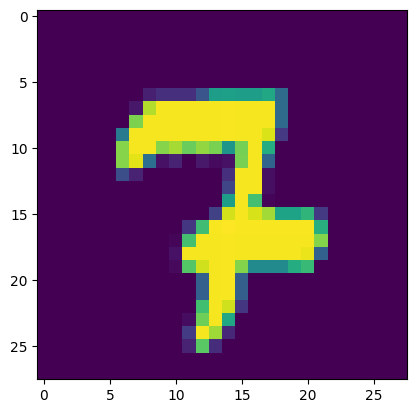

In [19]:
tt = np.random.randint(1000)
plt.imshow(x_train[tt].reshape(28,28))
b+ np.matmul(x_train[tt].transpose(),w)

## Batch size: 100

### Training

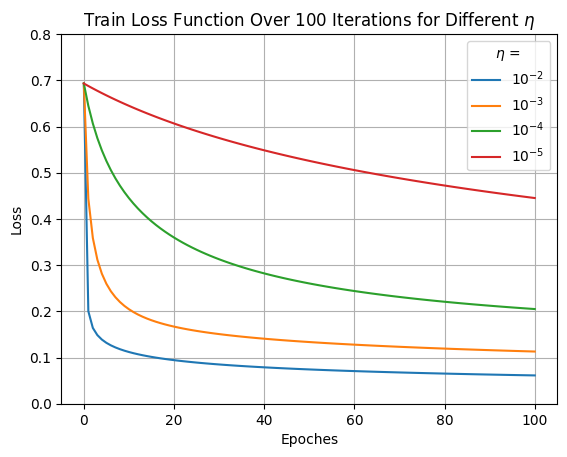

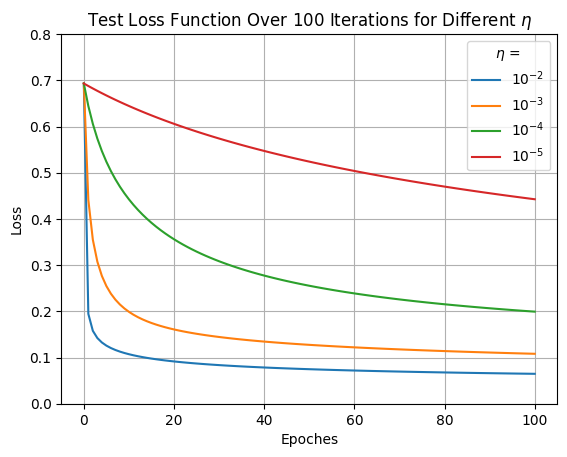

In [20]:
epoch = 100
loss = [0]*4
loss[0] = mnist_model(w,b,10**-2,100, batch_size=100)[:2]
loss[1] = mnist_model(w,b,10**-3,100, batch_size=100)[:2]
loss[2] = mnist_model(w,b,10**-4,100, batch_size=100)[:2]
loss[3] = mnist_model(w,b,10**-5,100, batch_size=100)[:2]
plt.figure()
for i in range(4):
    plt.plot(loss[i][0])
plt.legend(['$10^{-2}$','$10^{-3}$','$10^{-4}$','$10^{-5}$'], title="$\eta$ = ")
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.title(f"Train Loss Function Over {epoch} Iterations for Different $\eta$")
plt.ylim([0,0.8])
plt.grid("ON")
# test plot
plt.figure()
for i in range(4):
    plt.plot(loss[i][1])
plt.legend(['$10^{-2}$','$10^{-3}$','$10^{-4}$','$10^{-5}$'], title="$\eta$ = ")
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.title(f"Test Loss Function Over {epoch} Iterations for Different $\eta$")
plt.ylim([0,0.8])
plt.grid("ON")

### Evaluation

In [21]:
train_loss, test_loss ,w ,b = mnist_model(w,b,10**-2,100, batch_size = 100)

In [22]:
n_corrects = 0
for i in range(n_train):
    result = np.sign(b+ np.matmul(x_train[i].transpose(),w))
    if int(result) == y_train[i]:
        n_corrects += 1
print(f"Model accuracy is {n_corrects/n_train*100:0.2f}%")

n_corrects = 0
for i in range(n_test):
    result = np.sign(b+ np.matmul(x_test[i].transpose(),w))
    if int(result) == y_test[i]:
        n_corrects += 1
print(f"Model accuracy is {n_corrects/n_test*100:0.2f}%")

Model accuracy is 98.72%
Model accuracy is 99.07%


array([[-6.79800121]])

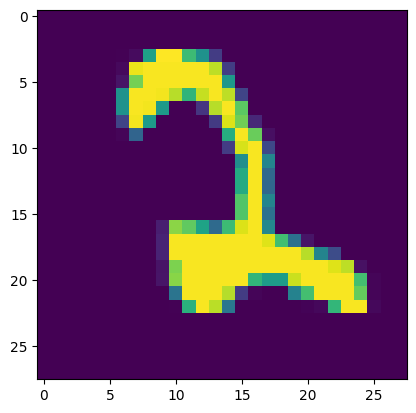

In [23]:
tt = np.random.randint(1000)
plt.imshow(x_train[tt].reshape(28,28))
b+ np.matmul(x_train[tt].transpose(),w)